In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-placement-dataset/job_placement.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/job-placement-dataset/job_placement.csv")
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [4]:
df.iloc[0:5,0:3]

,id,name,gender
0,1,John Doe,Male
1,2,Jane Smith,Female
2,3,Michael Johnson,Male
3,4,Emily Davis,Female
4,5,David Brown,Male


In [5]:
df_new=df.drop_duplicates(subset=['name','salary','age','degree','years_of_experience'] ).copy()
df_new


,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
468,469,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of Delaware,Placed,65000,3.7,1.0
470,471,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Texas--Dallas,Placed,63000,3.6,1.0
471,472,Jack Garcia,Male,26,Bachelor's,Information Technology,University of Virginia,Placed,64000,3.9,2.0
474,475,Chloe Hernandez,Female,26,Bachelor's,Electrical Engineering,University of Washington,Placed,67000,3.8,3.0


In [6]:
df_new.sort_values(by="salary",ascending=False)

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
49,50,Chloe Peterson,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,68000,3.9,3.0
295,296,Isabella Martinez,Female,23,Bachelor's,Electronics and Communication,University of Michigan--Ann Arbor,Placed,68000,3.9,3.0
269,270,William Garcia,Male,23,Bachelor's,Computer Science,University of Texas--Austin,Placed,68000,3.9,3.0
312,313,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of Michigan--Ann Arbor,Placed,68000,3.9,3.0
214,215,Sophia Martinez,Female,25,Bachelor's,Computer Science,University of Texas--Austin,Placed,68000,3.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...
248,249,Emma Brown,Female,23,Bachelor's,Electronics and Communication,University of Pennsylvania,Not Placed,0,3.7,2.0
367,368,Jack Garcia,Male,26,Bachelor's,Information Technology,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0
237,238,Noah Garcia,Male,24,Bachelor's,Mechanical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0
430,431,Aiden Davis,Male,24,Bachelor's,Computer Science,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0


In [7]:
df_new.describe()

,id,age,salary,gpa,years_of_experience
count,294.000000,294.000000,294.000000,294.000000,293.000000
mean,267.768707,24.404762,52928.571429,3.746259,2.174061
std,135.951184,1.137078,24669.107126,0.118450,0.776634
min,1.000000,23.000000,0.000000,3.400000,1.000000
25%,208.250000,23.000000,61000.000000,3.700000,2.000000
50%,291.500000,24.000000,64000.000000,3.700000,2.000000
75%,367.750000,26.000000,66000.000000,3.800000,3.000000
max,545.000000,26.000000,68000.000000,3.900000,3.000000


In [8]:
df_new[df_new['placement_status']=='Placed'].sort_index()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
5,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...
468,469,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of Delaware,Placed,65000,3.7,1.0
470,471,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Texas--Dallas,Placed,63000,3.6,1.0
471,472,Jack Garcia,Male,26,Bachelor's,Information Technology,University of Virginia,Placed,64000,3.9,2.0
474,475,Chloe Hernandez,Female,26,Bachelor's,Electrical Engineering,University of Washington,Placed,67000,3.8,3.0


In [9]:
df_new.columns

Index(['id', 'name', 'gender', 'age', 'degree', 'stream', 'college_name',
       'placement_status', 'salary', 'gpa', 'years_of_experience'],
      dtype='object')

In [10]:
df_new.select_dtypes(include=['object', 'bool'])



,name,gender,degree,stream,college_name,placement_status
0,John Doe,Male,Bachelor's,Computer Science,Harvard University,Placed
1,Jane Smith,Female,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed
2,Michael Johnson,Male,Bachelor's,Mechanical Engineering,Stanford University,Placed
3,Emily Davis,Female,Bachelor's,Information Technology,Yale University,Not Placed
4,David Brown,Male,Bachelor's,Computer Science,Princeton University,Placed
...,...,...,...,...,...,...
468,Emma Martinez,Female,Bachelor's,Electronics and Communication,University of Delaware,Placed
470,Mia Wilson,Female,Bachelor's,Electrical Engineering,University of Texas--Dallas,Placed
471,Jack Garcia,Male,Bachelor's,Information Technology,University of Virginia,Placed
474,Chloe Hernandez,Female,Bachelor's,Electrical Engineering,University of Washington,Placed


In [11]:
df_new.query("gpa>3.7")

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
6,7,James Martinez,Male,26,Bachelor's,Information Technology,California Institute of Technology,Placed,59000,3.8,3.0
10,11,William Hernandez,Male,24,Bachelor's,Computer Science,Duke University,Placed,61000,3.9,2.0
11,12,Ava Lopez,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...
455,456,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of Virginia,Placed,64000,3.9,2.0
460,461,Oliver Rodriguez,Male,23,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
464,465,Isabella Martinez,Female,23,Bachelor's,Electronics and Communication,University of Rochester,Placed,62000,3.8,3.0
471,472,Jack Garcia,Male,26,Bachelor's,Information Technology,University of Virginia,Placed,64000,3.9,2.0


In [12]:
df_new.reset_index(inplace=True)

In [13]:
df_new["stream"].value_counts()

stream
Computer Science                 83
Information Technology           62
Electronics and Communication    51
Electrical Engineering           49
Mechanical Engineering           49
Name: count, dtype: int64

In [14]:
df_new[df_new['college_name'] == 'Harvard University']['salary'].mean()

60000.0

In [15]:
df_new[df_new['college_name']=='Princeton University']['salary'].mean()

62000.0

In [16]:
df.apply(np.max)

id                                        700
name                        William Hernandez
gender                                   Male
age                                        26
degree                             Bachelor's
stream                 Mechanical Engineering
college_name                  Yale University
placement_status                       Placed
salary                                  68000
gpa                                       3.9
years_of_experience                       3.0
dtype: object

In [17]:
pd.crosstab(df['gender'], df['salary'],margins=True)

salary,0,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,All
gender,,,,,,,,,,,,,,
Female,63,1,0,0,14,24,24,41,21,53,65,46,14,366
Male,67,0,1,3,23,13,13,37,26,36,71,40,4,334
All,130,1,1,3,37,37,37,78,47,89,136,86,18,700


In [18]:
pd.crosstab(df['placement_status'], df['gpa'],margins=True)

gpa,3.4,3.5,3.6,3.7,3.8,3.9,All
placement_status,,,,,,,
Not Placed,8,1,43,40,4,34,130
Placed,0,37,41,173,173,146,570
All,8,38,84,213,177,180,700


In [19]:
req=['salary','gpa']
df_new.groupby(['gender'])[req].describe()

salary                                                              \
        count          mean           std  min      25%      50%      75%   
gender                                                                      
Female  157.0  51719.745223  25816.371866  0.0  61000.0  64000.0  66000.0   
Male    137.0  54313.868613  23301.966537  0.0  61000.0  64000.0  66000.0   

                   gpa                                               
            max  count      mean       std  min  25%  50%  75%  max  
gender                                                               
Female  68000.0  157.0  3.740127  0.120820  3.4  3.7  3.7  3.8  3.9  
Male    68000.0  137.0  3.753285  0.115715  3.5  3.7  3.7  3.9  3.9

In [20]:
df_new['raise_issued'] = df_new['salary'] * 0.05 * df_new['years_of_experience']
df_new


,index,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,raise_issued
0,0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0,6000.0
1,1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0,3250.0
2,2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0,8700.0
3,3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0,0.0
4,4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0,6200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,468,469,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of Delaware,Placed,65000,3.7,1.0,3250.0
290,470,471,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Texas--Dallas,Placed,63000,3.6,1.0,3150.0
291,471,472,Jack Garcia,Male,26,Bachelor's,Information Technology,University of Virginia,Placed,64000,3.9,2.0,6400.0
292,474,475,Chloe Hernandez,Female,26,Bachelor's,Electrical Engineering,University of Washington,Placed,67000,3.8,3.0,10050.0


Text(0.5, 1.0, 'emp_report')

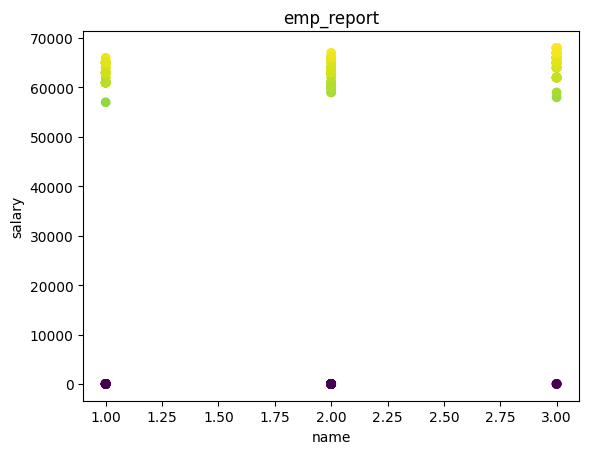

In [21]:
plt.scatter(df_new['years_of_experience'], df_new['salary'],c=df_new['salary'])
plt.xlabel('name')
plt.ylabel('salary')
plt.title('emp_report')


<Axes: xlabel='salary', ylabel='count'>

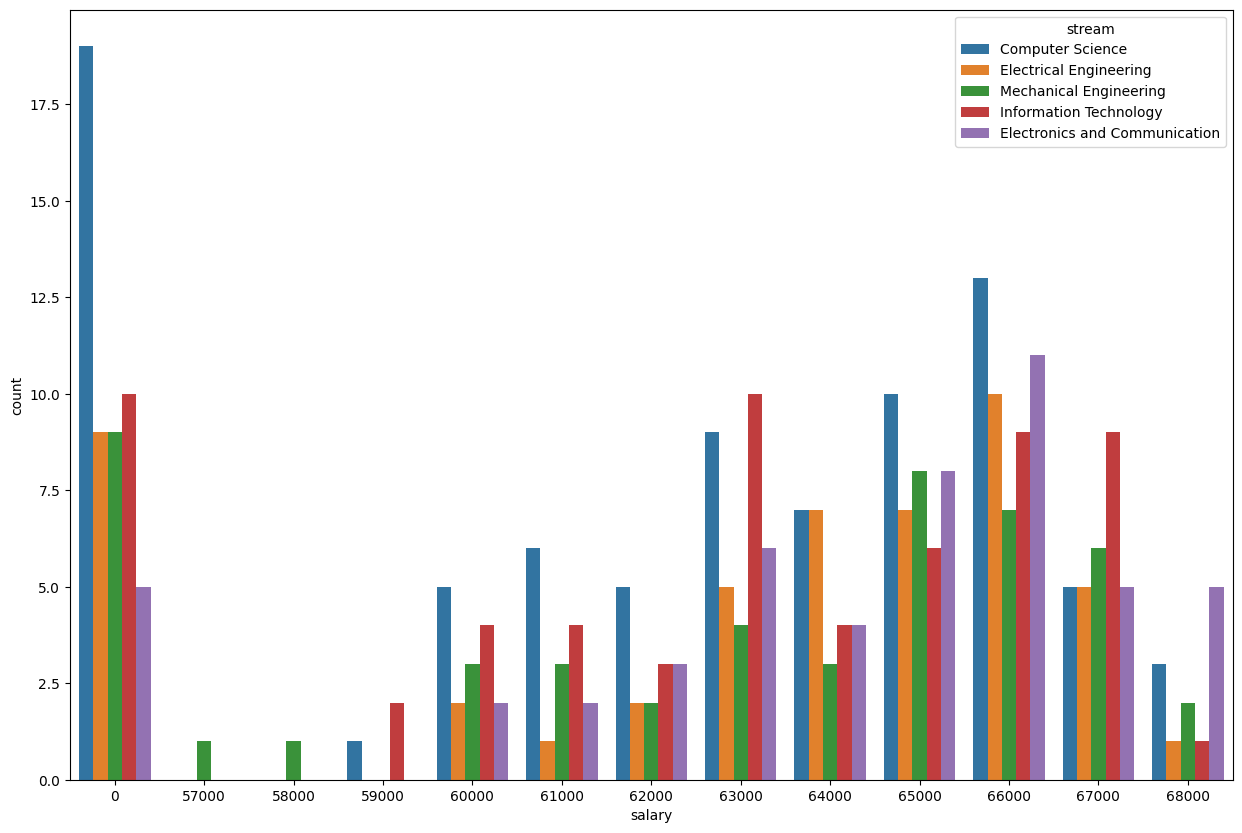

In [22]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(x='salary',hue='stream',data=df_new)

<Axes: xlabel='placement_status', ylabel='count'>

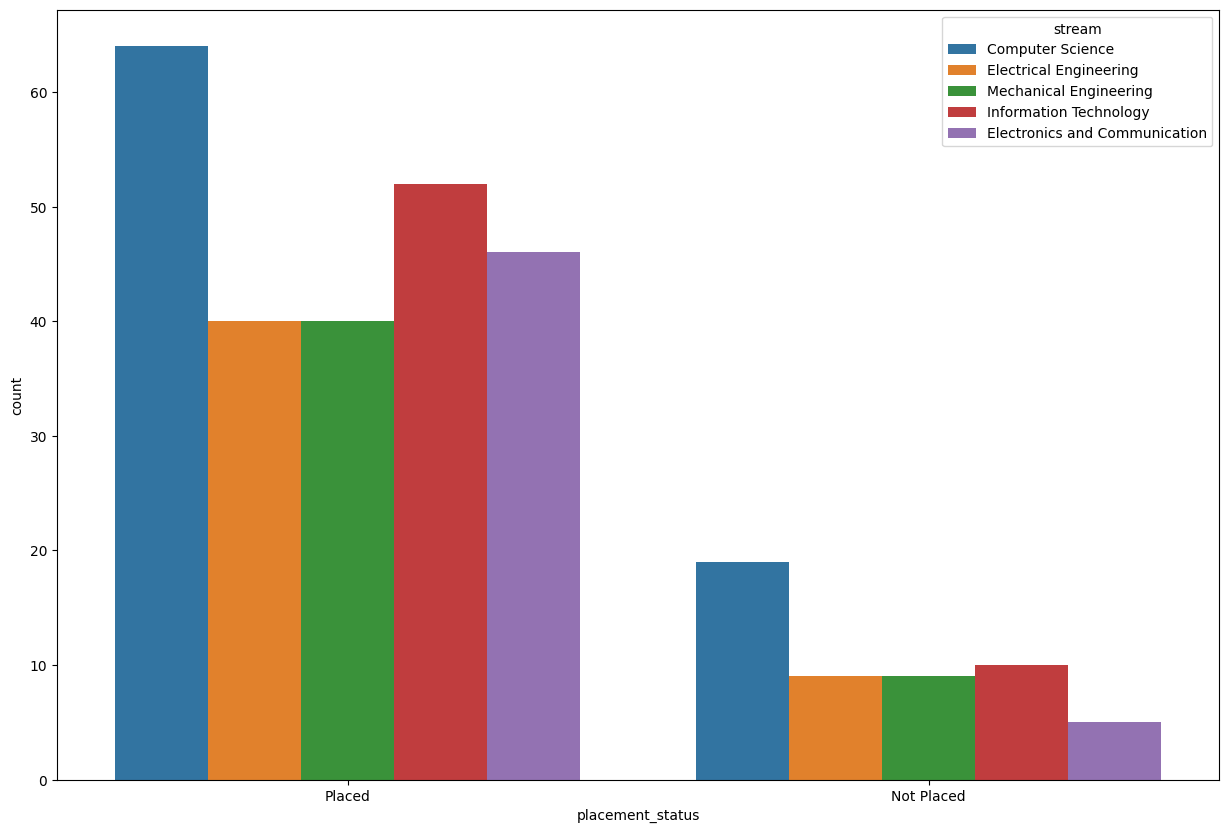

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='placement_status',hue='stream',data=df_new)

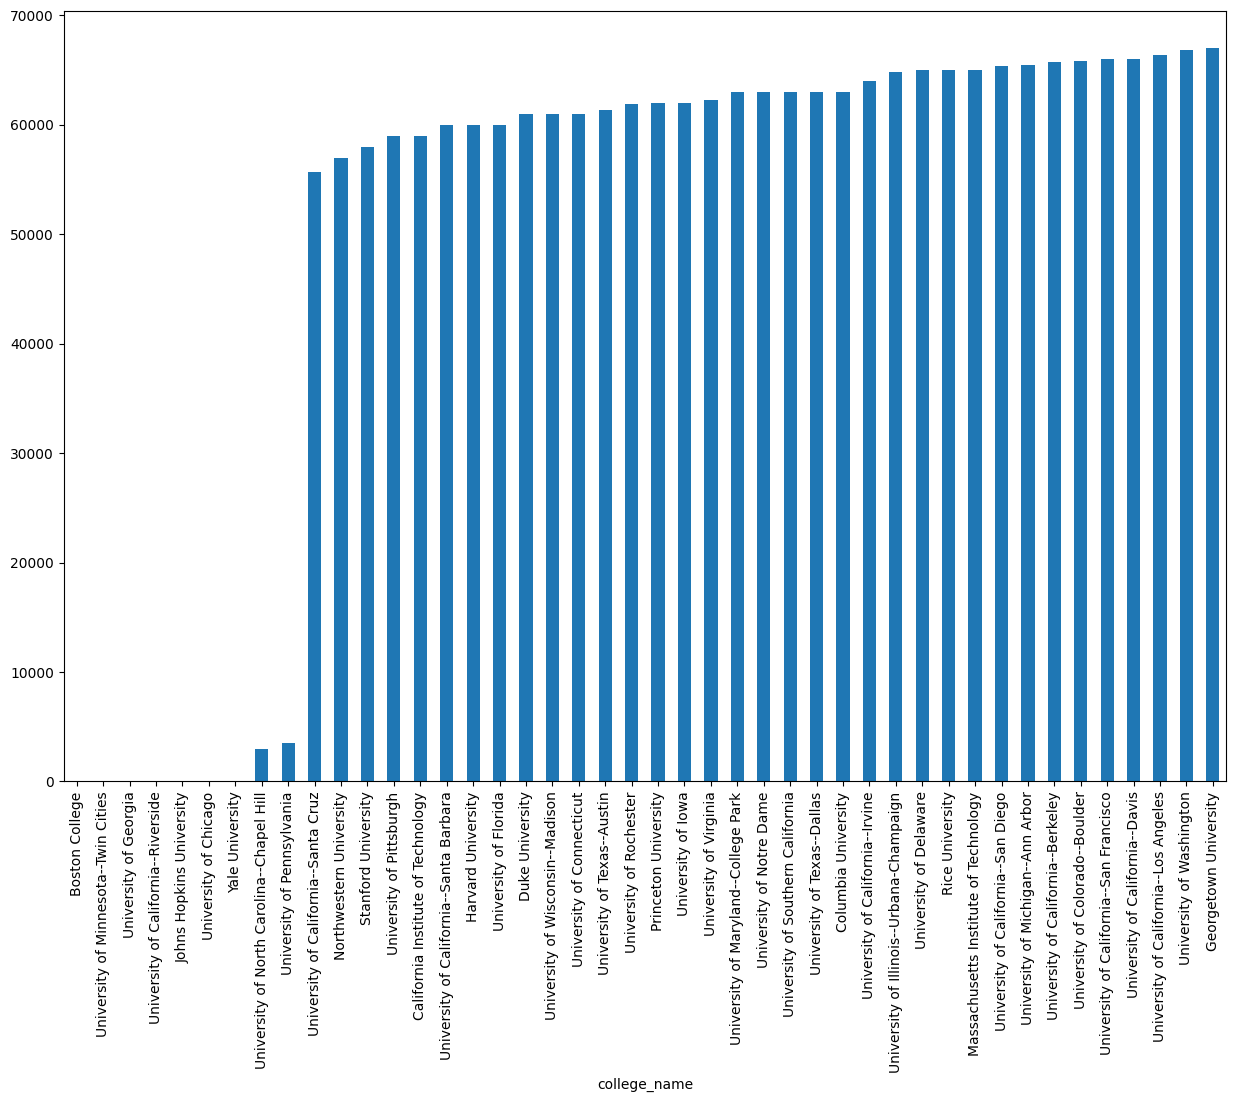

In [24]:
plt.figure(figsize=(15,10))
most_payed=df_new.groupby('college_name')['salary'].agg(['mean']).sort_values('mean')['mean'].plot(kind='bar')

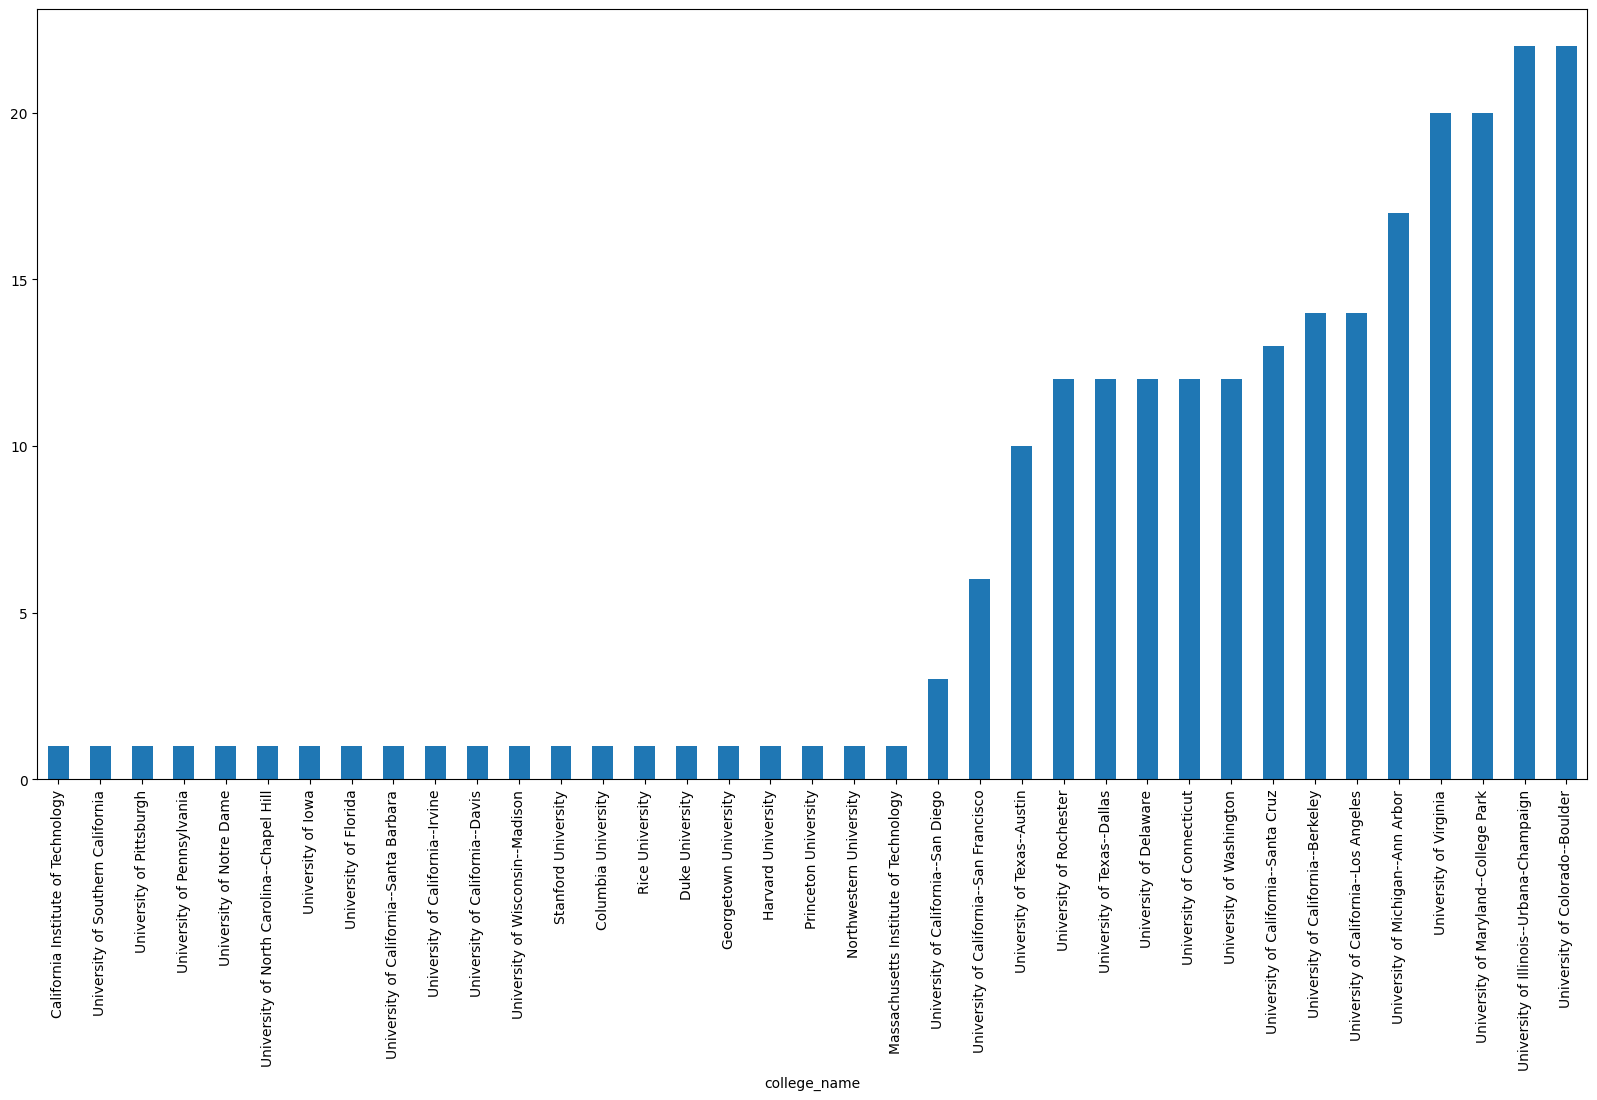

In [25]:
plt.figure(figsize=(20,10))
max_placed=df_new[df_new['placement_status']=='Placed'].groupby('college_name').size().sort_values().plot(kind='bar')